In [1]:
# chargement des bibliotheques .......

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sqlite3
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder
from keras.utils import np_utils
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
np.set_printoptions(precision=3, suppress=True)
print(tf.__version__)


2.6.0


In [5]:
'''
Ceci est important pour garantir que les résultats que nous obtenons grâce à ce modèle
puissent être obtenus à nouveau avec précision.
Cela garantit que le processus stochastique de formation d’un modèle de réseau neuronal peut être reproduit. 
'''

# fix random seed for reproducibility

seed = 42
np.random.seed(seed)

In [6]:
# load dataset
data = pd.read_csv("iris.csv") #, index_col="Id")
# dataset = dataframe.values


In [7]:
# pour afficher le dataframe

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# Dimension ( nombre de lignes, nombre de colonnes)

data.shape

(150, 6)

In [9]:


data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
# pour isoler la variable à expliquée ( cible): Y
# 

Y = data['Species']
X = data.drop(['Id', 'Species'], axis=1)
print("dimension des caractéristiques: {}".format(X.shape))
print("dimension de la cible: {}".format(Y.shape))

dimension des caractéristiques: (150, 4)
dimension de la cible: (150,)


In [11]:
# pour convertir en float32 toutes les caractéristiques...........

X = X.astype('float32')

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float32
 1   SepalWidthCm   150 non-null    float32
 2   PetalLengthCm  150 non-null    float32
 3   PetalWidthCm   150 non-null    float32
dtypes: float32(4)
memory usage: 2.5 KB


In [13]:


Y.value_counts()



Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [15]:
# Encodage de variables one-hot

le = LabelEncoder()
Y_encoded = le.fit_transform(Y)


Y_final = tf.keras.utils.to_categorical(Y_encoded)

Y_final.shape

(150, 3)

In [16]:
Y_final[0:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [18]:
# pour créer un jeu de données d entrainement et de test

x_train, x_test, y_train, y_test = train_test_split(X, Y_final, test_size=0.25, random_state=seed) #, stratify=Y_encoded, shuffle=True)

print("données d entrainement \t: {}".format(x_train.shape))
print("étiquettes d entrainement\t: {}".format(y_train.shape))
print("données de test\t: {}".format(x_test.shape))
print("étiquettes de test: {}".format(y_test.shape))


données d entrainement 	: (112, 4)
étiquettes d entrainement	: (112, 3)
données de test	: (38, 4)
étiquettes de test: (38, 3)


In [20]:
# Standardisation des données d entrainement et de test

std = StandardScaler()
x_train_new = std.fit_transform(x_train)
x_test_new = std.transform(x_test)

In [21]:
# Architecture du model 

model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [23]:
# pour afficher les poids et biais d'une couche particuliere.............
# Les poids sont représentés dans une matrice. 
# Les biais par un vecteur.
# indiquer simplement la couche ('dense')

hidden = model.get_layer('dense') # préciser la couche
weights,biases = hidden.get_weights()

print('les poids :\n', weights)
print('\n')
print('les dimensions des poids......', weights.shape)
print('\n')
print('les biais......', biases)

# Une premiere matrice de 4 lignes parce que 4 couches en entrée (input_dim=4)
# et 8 colonnes parce que 8 neurones dans la couche intermédiaire
# ensuite un vecteur avcec 2 valeurs
#  ensuite un vecteur avec 8 valeurs lien entre biais et les 8 couches de sortie

les poids :
 [[-0.089  0.482  0.064 -0.045  0.593 -0.694  0.346  0.486]
 [-0.591  0.48   0.617  0.361  0.062  0.517 -0.135 -0.262]
 [-0.195 -0.435 -0.593  0.366  0.099  0.28   0.642  0.172]
 [ 0.573 -0.51  -0.635  0.662  0.207 -0.671 -0.021 -0.435]]


les dimensions des poids...... (4, 8)


les biais...... [0. 0. 0. 0. 0. 0. 0. 0.]


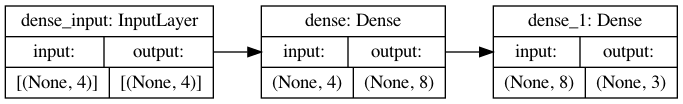

In [24]:
# Cette fonction `rankdir='LR'` permet un affichage graphique horizontal.

tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [25]:
# pour afficher les poids et biais d'une couche particuliere.............
# Les poids sont représentés dans une matrice. 
# Les biais par un vecteur.
# indiquer simplement la couche ('dense')

hidden = model.get_layer('dense_1') # préciser la couche
weights,biases = hidden.get_weights()

print('les poids :\n', weights)
print('\n')
print('les dimensions des poids......', weights.shape)
print('\n')
print('les biais......', biases)

# Une premiere matrice de 8 lignes parce que couche entrée 8 neurones
# et 3 colonnes parce que 3 neurones dans la couche de sortie
# la dimension des poids
# ensuite un vecteur avec 3 valeurs lien entre biais et les 3 couches de sortie

les poids :
 [[ 0.399 -0.542 -0.54 ]
 [-0.332 -0.271  0.695]
 [ 0.527  0.066  0.139]
 [ 0.6    0.641  0.643]
 [ 0.538  0.193 -0.086]
 [ 0.47  -0.663  0.385]
 [-0.428  0.431 -0.012]
 [-0.069 -0.668 -0.624]]


les dimensions des poids...... (8, 3)


les biais...... [0. 0. 0.]


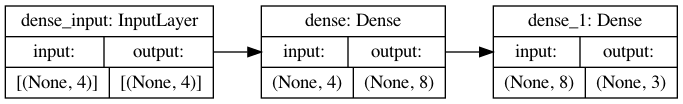

In [26]:
# Pour un affichage `rankdir='LR'` est rendre le graphique horizontal.

tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [27]:
# Compilation du model

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [28]:
# entrainement du model

iris_model = model.fit(x_train_new,
                       y_train,
                       epochs=100,
                       batch_size=7)

2024-01-09 22:16:12.302893: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 1.1881 - accuracy: 0.2054
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 1.1012 - accuracy: 0.3125
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 1.0241 - accuracy: 0.4196
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9580 - accuracy: 0.4821
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9008 - accuracy: 0.4911
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8503 - accuracy: 0.5089
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8058 - accuracy: 0.5446
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7658 - accuracy: 0.5446
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.5982
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.6429
Epoch 11/

16/16 [==============================] - 0s 1ms/step - loss: 0.2339 - accuracy: 0.9018
Epoch 84/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2303 - accuracy: 0.9107
Epoch 85/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2266 - accuracy: 0.9107
Epoch 86/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2231 - accuracy: 0.9196
Epoch 87/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2201 - accuracy: 0.9196
Epoch 88/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2166 - accuracy: 0.9196
Epoch 89/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2139 - accuracy: 0.9196
Epoch 90/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2109 - accuracy: 0.9196
Epoch 91/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2078 - accuracy: 0.9196
Epoch 92/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2052 - accuracy: 0.9196
Epoch 93/100


In [29]:
# Evalution du model

model.evaluate(x_test_new, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.1290 - accuracy: 0.9737


[0.12901811301708221, 0.9736841917037964]

<AxesSubplot:title={'center':'Loss and Accuracy'}>

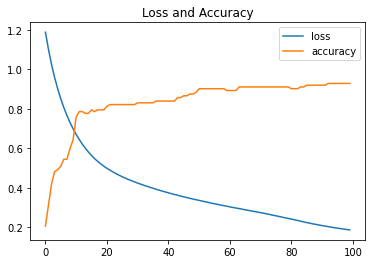

In [30]:
# Pour tracer la perte et la précision  

pd.DataFrame(iris_model.history).plot(title="Loss and Accuracy")